Things to do:

1. Load CSV file of one user
2. Check for correlations

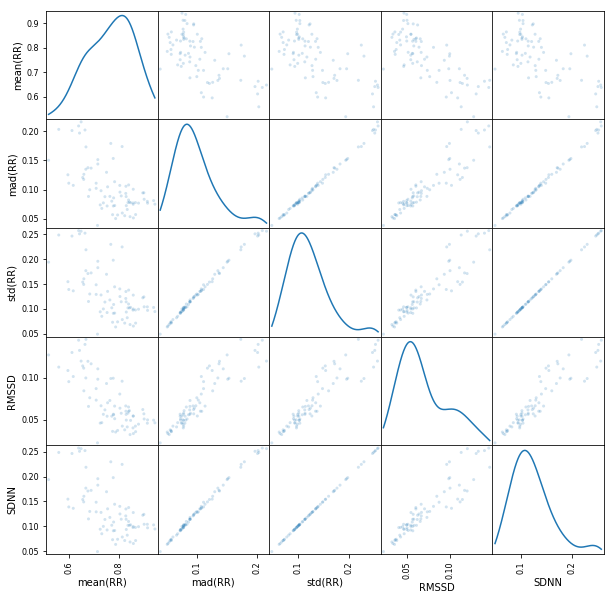

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

user_data = pd.read_csv('max/5a2b02b7b07e944d86d41969_export.csv', 
                         delimiter=';',
                         header=0,
                         decimal='.')

scatter_matrix(user_data[['mean(HR)', 'mean(RR)', 'mad(HR)', 'mad(RR)', 'std(HR)', 'std(RR)', 'RMSSD', 'SDNN']], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()


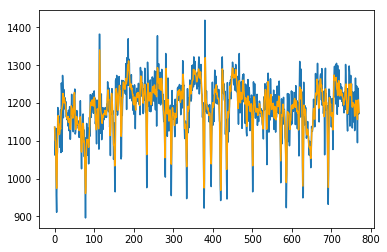

In [2]:
# Test intervals from package

from hrv.filters import moving_average

rri = [1136, 1062, 1107, 1133, 956, 911, 1057, 1071, 1188, 1146, 1166, 1122, 1145, 1083, 1143, 1181, 1069, 1253, 1225, 1072, 1273, 1242, 1161, 1236, 1206, 1204, 1214, 1183, 1204, 1165, 1166, 1156, 1158, 1173, 1139, 1181, 1127, 1159, 1190, 1104, 1105, 1181, 1173, 1223, 1168, 1165, 1191, 1124, 1187, 1223, 1223, 1237, 1118, 1122, 1151, 1162, 1180, 1142, 1143, 1153, 1133, 1143, 1109, 1130, 1143, 1206, 1141, 1065, 1026, 1120, 1106, 1162, 1171, 1104, 1129, 1058, 1109, 985, 896, 1001, 1041, 1146, 1104, 1062, 1134, 1112, 1039, 1098, 1162, 1112, 1222, 1222, 1162, 1218, 1201, 1199, 1225, 1183, 1173, 1220, 1232, 1194, 1213, 1145, 1155, 1141, 1092, 1208, 1190, 1156, 1185, 1133, 1078, 1382, 1382, 1257, 1120, 1187, 1224, 1103, 1149, 1187, 1130, 1187, 1171, 1156, 1184, 1170, 1188, 1163, 1179, 1162, 1197, 1180, 1256, 1236, 1212, 1177, 1239, 1137, 1144, 1061, 1167, 1214, 1224, 1238, 1169, 1180, 1146, 1051, 1073, 1147, 989, 965, 1259, 1264, 1178, 1273, 1233, 1168, 1191, 1184, 1201, 1270, 1222, 1247, 1223, 1225, 1052, 1059, 1260, 1167, 1218, 1257, 1259, 1250, 1234, 1255, 1230, 1224, 1304, 1265, 1183, 1320, 1285, 1247, 1370, 1248, 1316, 1305, 1212, 1264, 1250, 1226, 1275, 1206, 1240, 1246, 1181, 1241, 1175, 1170, 1248, 1229, 1132, 1212, 1200, 1222, 1239, 1212, 1227, 1204, 1252, 1207, 1196, 1216, 1169, 1294, 1265, 1255, 1284, 1218, 1253, 1204, 1172, 1223, 1238, 1208, 1292, 1248, 1175, 1250, 1145, 976, 1070, 1308, 1258, 1192, 1225, 1213, 1178, 1244, 1261, 1177, 1201, 1209, 1193, 1269, 1249, 1212, 1265, 1205, 1253, 1285, 1204, 1182, 1283, 1242, 1139, 1269, 1378, 1234, 1255, 1304, 1199, 1267, 1245, 1281, 1195, 1255, 1252, 1289, 1248, 1199, 1223, 1175, 1151, 1206, 1141, 1021, 1004, 1331, 1292, 1251, 1185, 1112, 1217, 1266, 1144, 1126, 1187, 1165, 1186, 1194, 1093, 955, 1067, 1233, 1172, 1158, 1193, 1157, 1172, 1139, 1111, 1210, 1161, 1146, 1195, 1146, 1212, 1240, 1211, 1243, 1207, 1246, 1249, 1211, 1225, 1169, 1246, 1245, 1200, 1187, 1312, 1272, 1245, 1247, 1140, 1106, 1152, 1152, 1127, 1086, 947, 1062, 1238, 1121, 1214, 1202, 1135, 1217, 1261, 1225, 1256, 1205, 1212, 1299, 1234, 1245, 1301, 1243, 1322, 1291, 1249, 1310, 1269, 1274, 1279, 1253, 1237, 1279, 1281, 1244, 1304, 1322, 1224, 1281, 1293, 1252, 1302, 1246, 1227, 1221, 1162, 1201, 1146, 1008, 922, 996, 1419, 1316, 1225, 1177, 1232, 1185, 1172, 1195, 1180, 1187, 1165, 1150, 1196, 1174, 1129, 1031, 979, 1107, 1144, 1255, 1141, 1206, 1220, 1151, 1223, 1287, 1200, 1215, 1271, 1229, 1246, 1198, 1233, 1205, 1197, 1236, 1192, 1153, 1147, 983, 942, 982, 1111, 1298, 1322, 1251, 1286, 1225, 1251, 1211, 1206, 1231, 1117, 1157, 1133, 994, 946, 1254, 1096, 1180, 1208, 1124, 1193, 1254, 1220, 1261, 1211, 1271, 1268, 1274, 1308, 1296, 1265, 1248, 1285, 1291, 1234, 1276, 1302, 1288, 1230, 1271, 1248, 1205, 1208, 1144, 1244, 1331, 1202, 1174, 1252, 1176, 1256, 1239, 1133, 1263, 1275, 1229, 1277, 1203, 1216, 1231, 1146, 1250, 1245, 1123, 1113, 1178, 1203, 1262, 1191, 1152, 1241, 1220, 1127, 1194, 1211, 1162, 1221, 1202, 1070, 965, 1067, 1256, 1214, 1180, 1251, 1184, 1160, 1200, 1169, 1165, 1223, 1141, 1189, 1172, 1151, 1190, 1205, 1200, 1173, 1175, 1185, 1163, 1181, 1147, 1141, 1148, 1105, 1216, 1215, 1182, 1251, 1234, 1222, 1244, 1110, 1037, 1255, 1236, 1279, 1254, 1123, 1182, 1203, 1155, 1264, 1226, 1178, 1207, 1164, 1216, 1200, 1164, 1234, 1130, 1135, 1215, 1222, 1123, 1181, 1162, 1175, 1245, 1191, 1176, 1225, 1172, 1258, 1175, 1175, 1096, 989, 1056, 1211, 1092, 1205, 1198, 1178, 1215, 1144, 1183, 1163, 1109, 1101, 1042, 923, 1004, 1112, 1225, 1195, 1098, 1224, 1198, 1087, 1133, 1170, 1150, 1142, 1232, 1205, 1145, 1229, 1181, 1178, 1204, 1210, 1198, 1228, 1143, 1246, 1177, 1194, 1206, 1132, 1202, 1186, 1140, 1060, 1236, 1310, 1181, 1163, 1290, 1186, 1230, 1206, 1031, 949, 961, 1255, 1187, 1142, 1193, 1170, 1188, 1140, 1107, 1115, 1125, 1151, 1115, 1112, 1089, 1062, 1099, 1084, 1069, 1029, 1062, 1138, 1128, 1125, 1137, 1166, 1210, 1180, 1158, 1137, 1177, 1278, 1206, 1196, 1263, 1221, 1305, 1221, 1210, 1199, 1150, 1259, 1242, 1271, 1277, 1243, 1208, 1291, 1194, 1219, 1210, 1172, 1197, 1232, 1063, 1239, 1292, 1181, 1225, 1186, 1193, 1155, 976, 932, 1022, 1237, 1234, 1172, 1217, 1189, 1185, 1137, 1174, 1212, 1136, 1077, 1174, 1258, 1267, 1297, 1216, 1281, 1301, 1197, 1305, 1233, 1170, 1299, 1191, 1269, 1288, 1220, 1226, 1210, 1251, 1240, 1214, 1242, 1204, 1227, 1221, 1192, 1218, 1174, 1229, 1218, 1183, 1302, 1248, 1201, 1236, 1154, 1126, 1238, 1184, 1170, 1298, 1282, 1139, 1248, 1273, 1229, 1251, 1204, 1134, 1229, 1223, 1150, 1211, 1229, 1127, 1140, 1266, 1187, 1168, 1245, 1159, 1095, 1215, 1239, 1171, 1175]
filt_rri = moving_average(rri, order=3)
plt.plot(rri)
plt.plot(filt_rri, color='orange')
plt.show()

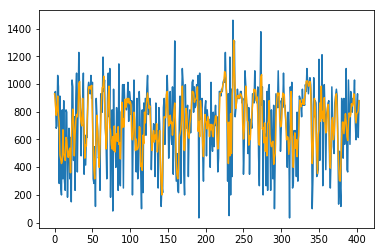

In [3]:
# Own data * 1000

rri = [929.1519999999999,945.7439999999999,680.2719999999999,696.8639999999999,1061.888,978.9279999999999,282.06399999999996,912.56,265.472,199.104,813.0079999999999,315.248,879.376,298.65599999999995,232.28799999999998,813.0079999999999,796.416,182.51199999999997,547.5360000000001,680.2719999999999,315.248,613.904,149.32799999999997,1028.704,978.9279999999999,447.984,763.2319999999999,232.28799999999998,895.968,1078.4799999999998,365.02399999999994,846.1919999999999,1227.808,929.1519999999999,895.968,481.168,779.824,829.6,1078.4799999999998,348.43199999999996,630.496,414.8,630.496,613.904,962.336,1012.1119999999999,962.336,929.1519999999999,1061.888,895.968,1012.1119999999999,315.248,282.06399999999996,547.5360000000001,116.14399999999999,895.968,763.2319999999999,663.68,464.57599999999996,497.76,232.28799999999998,929.1519999999999,929.1519999999999,796.416,1194.6239999999998,945.7439999999999,1028.704,680.2719999999999,597.3119999999999,315.248,895.968,1078.4799999999998,763.2319999999999,1111.664,182.51199999999997,696.8639999999999,813.0079999999999,82.96,962.336,514.352,613.904,398.208,829.6,696.8639999999999,232.28799999999998,1144.848,315.248,265.472,796.416,813.0079999999999,995.52,248.88,995.52,829.6,846.1919999999999,813.0079999999999,862.784,1012.1119999999999,730.0479999999999,945.7439999999999,895.968,779.824,879.376,199.104,713.456,1028.704,647.088,547.5360000000001,365.02399999999994,895.968,315.248,381.61599999999993,945.7439999999999,746.64,365.02399999999994,99.552,813.0079999999999,215.696,862.784,630.496,895.968,630.496,962.336,1061.888,779.824,796.416,895.968,829.6,381.61599999999993,597.3119999999999,580.72,713.456,696.8639999999999,331.84,862.784,613.904,663.68,248.88,829.6,713.456,447.984,116.14399999999999,265.472,215.696,829.6,895.968,564.1279999999999,813.0079999999999,895.968,1061.888,879.376,464.57599999999996,746.64,945.7439999999999,630.496,564.1279999999999,978.9279999999999,348.43199999999996,779.824,1310.768,497.76,298.65599999999995,497.76,232.28799999999998,215.696,730.0479999999999,912.56,282.06399999999996,829.6,1111.664,1012.1119999999999,365.02399999999994,199.104,995.52,680.2719999999999,796.416,846.1919999999999,331.84,680.2719999999999,813.0079999999999,647.088,796.416,1012.1119999999999,1028.704,796.416,978.9279999999999,829.6,846.1919999999999,995.52,879.376,1061.888,33.184,1078.4799999999998,746.64,813.0079999999999,895.968,497.76,298.65599999999995,630.496,829.6,879.376,481.168,813.0079999999999,730.0479999999999,746.64,713.456,398.208,1012.1119999999999,597.3119999999999,514.352,796.416,547.5360000000001,763.2319999999999,846.1919999999999,696.8639999999999,763.2319999999999,365.02399999999994,464.57599999999996,945.7439999999999,945.7439999999999,912.56,962.336,945.7439999999999,1012.1119999999999,1028.704,1012.1119999999999,1227.808,978.9279999999999,912.56,298.65599999999995,929.1519999999999,49.776,1194.6239999999998,199.104,962.336,331.84,1460.0959999999998,1178.032,1310.768,763.2319999999999,829.6,879.376,962.336,895.968,895.968,895.968,945.7439999999999,945.7439999999999,862.784,895.968,348.43199999999996,564.1279999999999,1095.0720000000001,995.52,862.784,846.1919999999999,497.76,829.6,348.43199999999996,696.8639999999999,746.64,680.2719999999999,929.1519999999999,929.1519999999999,862.784,1095.0720000000001,895.968,879.376,862.784,978.9279999999999,481.168,265.472,929.1519999999999,1377.136,846.1919999999999,978.9279999999999,199.104,879.376,647.088,630.496,265.472,945.7439999999999,232.28799999999998,962.336,995.52,680.2719999999999,232.28799999999998,813.0079999999999,597.3119999999999,315.248,846.1919999999999,99.552,464.57599999999996,929.1519999999999,879.376,829.6,1095.0720000000001,829.6,879.376,514.352,680.2719999999999,895.968,829.6,1078.4799999999998,846.1919999999999,846.1919999999999,730.0479999999999,663.68,398.208,796.416,647.088,33.184,978.9279999999999,846.1919999999999,1012.1119999999999,248.88,282.06399999999996,663.68,613.904,663.68,331.84,796.416,298.65599999999995,663.68,912.56,895.968,846.1919999999999,763.2319999999999,962.336,846.1919999999999,862.784,846.1919999999999,995.52,945.7439999999999,1111.664,1012.1119999999999,929.1519999999999,1012.1119999999999,1045.296,995.52,846.1919999999999,99.552,331.84,1045.296,763.2319999999999,879.376,862.784,331.84,348.43199999999996,381.61599999999993,1178.032,447.984,962.336,779.824,1211.216,265.472,929.1519999999999,995.52,779.824,381.61599999999993,779.824,813.0079999999999,862.784,879.376,447.984,248.88,481.168,978.9279999999999,746.64,547.5360000000001,497.76,862.784,912.56,962.336,912.56,597.3119999999999,132.736,514.352,265.472,116.14399999999999,895.968,813.0079999999999,464.57599999999996,895.968,564.1279999999999,680.2719999999999,1111.664,381.61599999999993,365.02399999999994,1028.704,779.824,564.1279999999999,945.7439999999999,829.6,796.416,895.968,862.784,1028.704,730.0479999999999,597.3119999999999,829.6,929.1519999999999,613.904,879.376]

filt_rri = moving_average(rri, order=3)
plt.plot(rri)
plt.plot(filt_rri, color='orange')
plt.show()

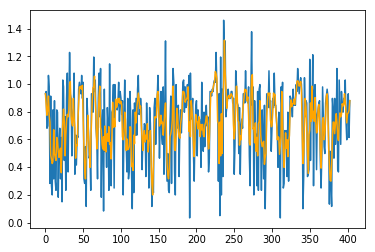

In [4]:
# Own data
rri = [0.92915199999999998,0.94574399999999992,0.68027199999999999,0.69686399999999993,1.0618879999999999,0.97892799999999991,0.28206399999999998,0.91255999999999993,0.26547199999999999,0.199104,0.81300799999999995,0.31524799999999997,0.87937599999999994,0.29865599999999998,0.23228799999999999,0.81300799999999995,0.79641600000000001,0.18251199999999998,0.54753600000000002,0.68027199999999999,0.31524799999999997,0.61390400000000001,0.14932799999999999,1.0287039999999998,0.97892799999999991,0.44798399999999999,0.76323199999999991,0.23228799999999999,0.89596799999999999,1.0784799999999999,0.36502399999999996,0.84619199999999994,1.227808,0.92915199999999998,0.89596799999999999,0.48116799999999998,0.77982399999999996,0.8296,1.0784799999999999,0.34843199999999996,0.63049599999999995,0.4148,0.63049599999999995,0.61390400000000001,0.96233599999999997,1.0121119999999999,0.96233599999999997,0.92915199999999998,1.0618879999999999,0.89596799999999999,1.0121119999999999,0.31524799999999997,0.28206399999999998,0.54753600000000002,0.116144,0.89596799999999999,0.76323199999999991,0.66367999999999994,0.46457599999999999,0.49775999999999998,0.23228799999999999,0.92915199999999998,0.92915199999999998,0.79641600000000001,1.1946239999999999,0.94574399999999992,1.0287039999999998,0.68027199999999999,0.59731199999999995,0.31524799999999997,0.89596799999999999,1.0784799999999999,0.76323199999999991,1.111664,0.18251199999999998,0.69686399999999993,0.81300799999999995,0.082959999999999992,0.96233599999999997,0.51435199999999992,0.61390400000000001,0.39820800000000001,0.8296,0.69686399999999993,0.23228799999999999,1.1448479999999999,0.31524799999999997,0.26547199999999999,0.79641600000000001,0.81300799999999995,0.99551999999999996,0.24887999999999999,0.99551999999999996,0.8296,0.84619199999999994,0.81300799999999995,0.862784,1.0121119999999999,0.73004799999999992,0.94574399999999992,0.89596799999999999,0.77982399999999996,0.87937599999999994,0.199104,0.71345599999999998,1.0287039999999998,0.647088,0.54753600000000002,0.36502399999999996,0.89596799999999999,0.31524799999999997,0.38161599999999996,0.94574399999999992,0.74663999999999997,0.36502399999999996,0.099552000000000002,0.81300799999999995,0.215696,0.862784,0.63049599999999995,0.89596799999999999,0.63049599999999995,0.96233599999999997,1.0618879999999999,0.77982399999999996,0.79641600000000001,0.89596799999999999,0.8296,0.38161599999999996,0.59731199999999995,0.58072000000000001,0.71345599999999998,0.69686399999999993,0.33183999999999997,0.862784,0.61390400000000001,0.66367999999999994,0.24887999999999999,0.8296,0.71345599999999998,0.44798399999999999,0.116144,0.26547199999999999,0.215696,0.8296,0.89596799999999999,0.56412799999999996,0.81300799999999995,0.89596799999999999,1.0618879999999999,0.87937599999999994,0.46457599999999999,0.74663999999999997,0.94574399999999992,0.63049599999999995,0.56412799999999996,0.97892799999999991,0.34843199999999996,0.77982399999999996,1.3107679999999999,0.49775999999999998,0.29865599999999998,0.49775999999999998,0.23228799999999999,0.215696,0.73004799999999992,0.91255999999999993,0.28206399999999998,0.8296,1.111664,1.0121119999999999,0.36502399999999996,0.199104,0.99551999999999996,0.68027199999999999,0.79641600000000001,0.84619199999999994,0.33183999999999997,0.68027199999999999,0.81300799999999995,0.647088,0.79641600000000001,1.0121119999999999,1.0287039999999998,0.79641600000000001,0.97892799999999991,0.8296,0.84619199999999994,0.99551999999999996,0.87937599999999994,1.0618879999999999,0.033183999999999998,1.0784799999999999,0.74663999999999997,0.81300799999999995,0.89596799999999999,0.49775999999999998,0.29865599999999998,0.63049599999999995,0.8296,0.87937599999999994,0.48116799999999998,0.81300799999999995,0.73004799999999992,0.74663999999999997,0.71345599999999998,0.39820800000000001,1.0121119999999999,0.59731199999999995,0.51435199999999992,0.79641600000000001,0.54753600000000002,0.76323199999999991,0.84619199999999994,0.69686399999999993,0.76323199999999991,0.36502399999999996,0.46457599999999999,0.94574399999999992,0.94574399999999992,0.91255999999999993,0.96233599999999997,0.94574399999999992,1.0121119999999999,1.0287039999999998,1.0121119999999999,1.227808,0.97892799999999991,0.91255999999999993,0.29865599999999998,0.92915199999999998,0.049776000000000001,1.1946239999999999,0.199104,0.96233599999999997,0.33183999999999997,1.4600959999999998,1.178032,1.3107679999999999,0.76323199999999991,0.8296,0.87937599999999994,0.96233599999999997,0.89596799999999999,0.89596799999999999,0.89596799999999999,0.94574399999999992,0.94574399999999992,0.862784,0.89596799999999999,0.34843199999999996,0.56412799999999996,1.095072,0.99551999999999996,0.862784,0.84619199999999994,0.49775999999999998,0.8296,0.34843199999999996,0.69686399999999993,0.74663999999999997,0.68027199999999999,0.92915199999999998,0.92915199999999998,0.862784,1.095072,0.89596799999999999,0.87937599999999994,0.862784,0.97892799999999991,0.48116799999999998,0.26547199999999999,0.92915199999999998,1.3771359999999999,0.84619199999999994,0.97892799999999991,0.199104,0.87937599999999994,0.647088,0.63049599999999995,0.26547199999999999,0.94574399999999992,0.23228799999999999,0.96233599999999997,0.99551999999999996,0.68027199999999999,0.23228799999999999,0.81300799999999995,0.59731199999999995,0.31524799999999997,0.84619199999999994,0.099552000000000002,0.46457599999999999,0.92915199999999998,0.87937599999999994,0.8296,1.095072,0.8296,0.87937599999999994,0.51435199999999992,0.68027199999999999,0.89596799999999999,0.8296,1.0784799999999999,0.84619199999999994,0.84619199999999994,0.73004799999999992,0.66367999999999994,0.39820800000000001,0.79641600000000001,0.647088,0.033183999999999998,0.97892799999999991,0.84619199999999994,1.0121119999999999,0.24887999999999999,0.28206399999999998,0.66367999999999994,0.61390400000000001,0.66367999999999994,0.33183999999999997,0.79641600000000001,0.29865599999999998,0.66367999999999994,0.91255999999999993,0.89596799999999999,0.84619199999999994,0.76323199999999991,0.96233599999999997,0.84619199999999994,0.862784,0.84619199999999994,0.99551999999999996,0.94574399999999992,1.111664,1.0121119999999999,0.92915199999999998,1.0121119999999999,1.045296,0.99551999999999996,0.84619199999999994,0.099552000000000002,0.33183999999999997,1.045296,0.76323199999999991,0.87937599999999994,0.862784,0.33183999999999997,0.34843199999999996,0.38161599999999996,1.178032,0.44798399999999999,0.96233599999999997,0.77982399999999996,1.2112159999999998,0.26547199999999999,0.92915199999999998,0.99551999999999996,0.77982399999999996,0.38161599999999996,0.77982399999999996,0.81300799999999995,0.862784,0.87937599999999994,0.44798399999999999,0.24887999999999999,0.48116799999999998,0.97892799999999991,0.74663999999999997,0.54753600000000002,0.49775999999999998,0.862784,0.91255999999999993,0.96233599999999997,0.91255999999999993,0.59731199999999995,0.13273599999999999,0.51435199999999992,0.26547199999999999,0.116144,0.89596799999999999,0.81300799999999995,0.46457599999999999,0.89596799999999999,0.56412799999999996,0.68027199999999999,1.111664,0.38161599999999996,0.36502399999999996,1.0287039999999998,0.77982399999999996,0.56412799999999996,0.94574399999999992,0.8296,0.79641600000000001,0.89596799999999999,0.862784,1.0287039999999998,0.73004799999999992,0.59731199999999995,0.8296,0.92915199999999998,0.61390400000000001,0.87937599999999994]

filt_rri = moving_average(rri, order=3)
plt.plot(rri)
plt.plot(filt_rri, color='orange')
plt.show()

In [5]:
sum = 0;

for i in range(1, len(rri)-1):
	sum += (rri[i - 1] - rri[i]) * (rri[i - 1] - rri[i])
	
rmssd = np.sqrt(sum / (len(rri) - 1))

print(rmssd)

0.384554692197


In [ ]:
from hrv.classical import frequency_domain

result = frequency_domain(
    rri=rri,
    fs=1.0,
    method='welch',
    interp_method='cubic',
    detrend='linear'
)

print(result)